In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [2]:
X=pd.read_csv("/kaggle/input/covtype-2/x_train.csv")
y=pd.read_csv("/kaggle/input/covtype-2/y_train.csv")

X = X[X.columns[1:]]
X.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
'Soil_Type_1', 'Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10',
'Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20',
'Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30',
'Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40']

y = y[y.columns[1:]]
y.columns=['Cover_Type']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10, stratify=y['Cover_Type'])

x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [4]:
print(X.columns[5])

Horizontal_Distance_To_Roadways


3.2.4.3.1. sklearn.ensemble.RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

1. n_estimators int, default=100:  The number of trees in the forest.

In [5]:
forest = RandomForestClassifier(n_estimators=10)

forest.fit(x_train, y_train.values.ravel())


RandomForestClassifier(n_estimators=10)

In [6]:
# Accuracy score
from sklearn.metrics import accuracy_score

y_pred = forest.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9297369952382123


<Figure size 432x288 with 0 Axes>

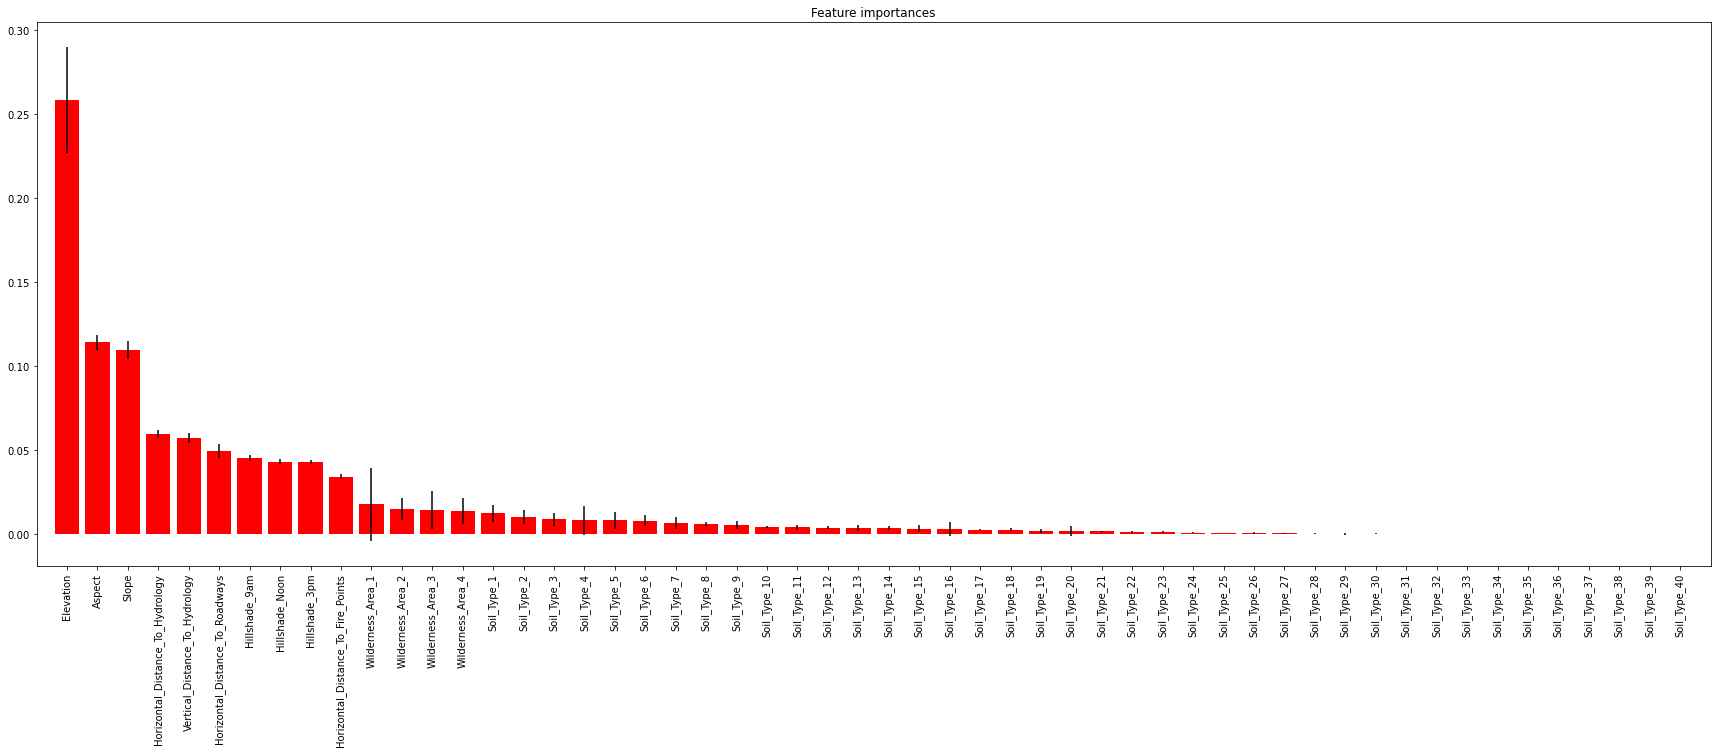

In [7]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
#print("Feature ranking:")
#for f in range(X.shape[1]):
#    print("%50s feature %d (%f)" % (X.columns[f], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()